# Can we predict which zipcode is next to experience explosive growth?

To answer this question, we will take the average airbnb features in 2019 and see if we can build a model that classifies each zipcode as high, low or moderate growth in 2020.

## Load Libraries and Dataframe

In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [4]:
airbnb_class_df = pd.read_csv("large_clean_data/airbnb_model_data_clean.csv", index_col=0)
zillow_class_df = pd.read_csv("cleaned_data/zillow_model_data_clean.csv", index_col=0)

In [5]:
airbnb_class_df.head()

,last_scraped,id,host_id,host_is_superhost,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host
151947,2015-06-29,6422,12172,0,37206.0,36.173151,-86.735813,2,1.0,1.0,...,0,0,0,0,0,0,0,0.700000,745.208333,0
87,2015-10-03,6422,12172,0,37206.0,36.173151,-86.735813,2,1.0,1.0,...,0,0,0,0,0,0,0,0.550368,585.912842,0
205880,2016-09-06,6422,12172,1,37206.0,36.173151,-86.735813,2,1.0,2.0,...,0,0,0,0,0,0,0,0.700000,745.208333,0
209372,2017-09-14,6422,12172,0,37206.0,36.173151,-86.735813,2,1.0,2.0,...,0,0,0,0,0,0,0,0.700000,745.208333,0
113349,2018-04-14,6422,12172,1,37206.0,36.173151,-86.735813,2,1.0,3.0,...,0,0,0,0,0,0,0,0.700000,851.666667,0


In [6]:
zillow_class_df

,37013,37211,37064,37027,37221,37209,37076,37115,37207,37214,...,37073,37218,37080,37220,37219,37143,37189,37201,37026,avg_home_value
index,,,,,,,,,,,,,,,,,,,,,
1996-01-01,109670.0,106734.0,185356.0,278097.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,...,97999.0,96715.0,100882.0,185197.0,NaN,102606.0,99095.0,NaN,NaN,115807.0
1996-02-01,110113.0,107099.0,185830.0,278949.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,...,98271.0,96743.0,100959.0,185138.0,NaN,102595.0,99161.0,NaN,NaN,116150.0
1996-03-01,110502.0,107465.0,186363.0,280102.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,...,98600.0,96824.0,101073.0,185521.0,NaN,102631.0,99564.0,NaN,NaN,116540.0
1996-04-01,111295.0,108224.0,187234.0,282052.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,...,99234.0,97066.0,101279.0,186392.0,NaN,102838.0,99833.0,NaN,NaN,117300.0
1996-05-01,112128.0,108963.0,188162.0,283765.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,...,99774.0,97800.0,101650.0,187482.0,NaN,103283.0,100366.0,NaN,NaN,118071.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,259031.0,293072.0,506703.0,688810.0,352922.0,372219.0,276223.0,231768.0,275291.0,267812.0,...,258717.0,241525.0,244317.0,561117.0,430796.0,285525.0,266038.0,383293.0,167794.0,298809.0
2020-11-01,261394.0,295822.0,512290.0,695955.0,355478.0,375011.0,278581.0,233924.0,279386.0,270533.0,...,261733.0,242735.0,246970.0,566165.0,430763.0,289212.0,268952.0,383351.0,168378.0,301461.0
2020-12-01,264071.0,299249.0,518804.0,704631.0,358583.0,378519.0,281249.0,236437.0,283637.0,273683.0,...,265054.0,244148.0,249040.0,572388.0,432595.0,293302.0,271794.0,383955.0,169000.0,304539.0


## Add % Increases in Zipcode Prices

In [7]:
zillow_class_df = zillow_class_df.T
zillow_class_df

index,1996-01-01,1996-02-01,1996-03-01,1996-04-01,1996-05-01,1996-06-01,1996-07-01,1996-08-01,1996-09-01,1996-10-01,...,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01
37013,109670.0,110113.0,110502.0,111295.0,112128.0,112982.0,113867.0,114736.0,115551.0,116199.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
37211,106734.0,107099.0,107465.0,108224.0,108963.0,109639.0,110367.0,111082.0,111876.0,112514.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
37064,185356.0,185830.0,186363.0,187234.0,188162.0,189085.0,190103.0,190882.0,191703.0,192556.0,...,488596.0,491014.0,493454.0,497781.0,502102.0,506703.0,512290.0,518804.0,523996.0,528333.0
37027,278097.0,278949.0,280102.0,282052.0,283765.0,285161.0,286776.0,288433.0,289973.0,291356.0,...,660580.0,664187.0,668981.0,676190.0,682782.0,688810.0,695955.0,704631.0,712062.0,718750.0
37221,147818.0,148278.0,148776.0,149757.0,150615.0,151485.0,152349.0,153349.0,154261.0,155079.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
37209,109565.0,109833.0,110119.0,110736.0,111338.0,112027.0,112493.0,113092.0,113650.0,114305.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
37076,111805.0,112174.0,112465.0,113059.0,113683.0,114306.0,114862.0,115347.0,115830.0,116427.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0
37115,83431.0,83844.0,84214.0,84939.0,85603.0,86245.0,86958.0,87665.0,88304.0,88769.0,...,221906.0,223547.0,225470.0,227345.0,229725.0,231768.0,233924.0,236437.0,238750.0,240945.0
37207,88757.0,88978.0,89205.0,89562.0,90104.0,90606.0,91224.0,91698.0,92414.0,93066.0,...,260175.0,262039.0,264413.0,267231.0,271242.0,275291.0,279386.0,283637.0,287225.0,290689.0
37214,90986.0,91382.0,91756.0,92508.0,93240.0,94038.0,94891.0,95740.0,96499.0,97123.0,...,256530.0,258352.0,260171.0,262305.0,264870.0,267812.0,270533.0,273683.0,276198.0,278854.0


In [8]:
zillow_class_df['20_21_inc'] = ((zillow_class_df['2021-02-01']/zillow_class_df['2020-02-01'])-1)*100
zillow_class_df['19_20_inc'] = ((zillow_class_df['2020-02-01']/zillow_class_df['2019-02-01'])-1)*100

In [9]:
zillow_class_df['CAGR'] = ((zillow_class_df['2021-02-01']/zillow_class_df['2016-02-01'])**(1/5)-1)*100

In [10]:
# decided to use 20-21 increase as our growth measure
zillow_class_df['20_21_inc'].describe()

count    36.000000
mean      9.823556
std       2.356725
min       3.918521
25%       8.748340
50%       9.864084
75%      11.416112
max      15.356898
Name: 20_21_inc, dtype: float64

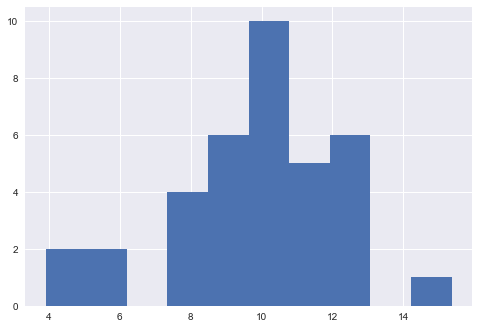

In [11]:
zillow_class_df['20_21_inc'].hist()

In [12]:
def growth_category(x):
    if x < 9:
        return 'low'
    elif x > 11:
        return 'high'
    else:
        return 'moderate'

In [13]:
zillow_class_df['growth'] = zillow_class_df['20_21_inc'].apply(lambda x: growth_category(x))

In [14]:
zillow_class_df['growth'].value_counts()

moderate    14
high        11
low         11
Name: growth, dtype: int64

## Create a dictionary of zipcodes and growth categories

In [15]:
growth_zips = dict(zip(list(zillow_class_df.index),list(zillow_class_df.growth)))

## Create Dataframe of 2019 Airbnb Data by Zipcode

In [16]:
airbnb_class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233369 entries, 151947 to 99590
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   last_scraped                      233369 non-null  object 
 1   id                                233369 non-null  int64  
 2   host_id                           233369 non-null  int64  
 3   host_is_superhost                 233369 non-null  int64  
 4   zipcode                           233369 non-null  float64
 5   latitude                          233369 non-null  float64
 6   longitude                         233369 non-null  float64
 7   accommodates                      233369 non-null  int64  
 8   bathrooms                         233369 non-null  float64
 9   beds                              233369 non-null  float64
 10  price                             233369 non-null  float64
 11  minimum_nights                    233369 non-nul

In [17]:
airbnb_class_df['last_scraped'] = pd.to_datetime(airbnb_class_df['last_scraped'])
airbnb_class_df.set_index('last_scraped',inplace=True)

In [18]:
airbnb_monthly = airbnb_class_df.resample('MS').mean()
airbnb_annual = airbnb_class_df.resample('Y').mean()

In [19]:
zipcode_class_df = airbnb_class_df.groupby('zipcode').sum()
zipcode_class_df

,id,host_id,host_is_superhost,latitude,longitude,accommodates,bathrooms,beds,price,minimum_nights,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,72577309334,361905047778,972,1.024581e+05,-2.462503e+05,12251,4412.0,6741.0,343273.86,12683.0,...,0,0,0,0,641,10,0,1201.520910,3.844985e+06,688
37015.0,595604787,2286507735,23,1.304405e+03,-3.129073e+03,96,38.0,56.0,3537.00,72.0,...,0,0,0,0,0,0,36,12.385376,3.355276e+04,1
37020.0,263181639,1988349055,0,2.533685e+02,-6.074133e+02,114,24.5,41.0,4181.00,7.0,...,0,0,0,0,0,0,0,3.372646,6.137853e+04,7
37026.0,39642501,121235121,0,3.619281e+01,-8.672556e+01,4,1.0,2.0,155.00,3.0,...,0,0,0,0,0,0,0,0.414256,1.953043e+03,1
37027.0,6307181012,21100495037,180,1.463199e+04,-3.523070e+04,1640,531.0,928.0,53114.00,5698.0,...,74,0,0,0,332,0,0,181.112178,6.782461e+05,76
37029.0,14866872,133537490,1,2.908306e+02,-6.939458e+02,46,12.0,16.0,830.00,12.0,...,0,0,0,0,0,0,0,1.808916,5.432819e+03,6
37064.0,283577834,1399056378,1,5.400223e+02,-1.305276e+03,76,23.0,34.0,2720.00,18.0,...,0,0,0,0,0,0,0,4.274435,2.651066e+04,10
37072.0,30151908847,107838280628,607,4.746937e+04,-1.133484e+05,6098,1895.5,3188.0,189630.86,4631.0,...,0,0,216,0,1,0,3,495.642083,1.985085e+06,388
37073.0,640300427,4704661581,16,7.643532e+02,-1.822000e+03,126,21.0,66.0,1753.00,42.0,...,0,0,0,0,0,0,0,10.421725,2.656617e+04,1


In [20]:
zipcode_class_df = airbnb_class_df['2019'].groupby('zipcode')
zipcode_class_monthly_df = zipcode_class_df.resample('M').sum()

In [21]:
zipcode_class_monthly_df

id      host_id  host_is_superhost    zipcode  \
zipcode last_scraped                                                          
37013.0 2019-01-31    1767116405   8551343029                 26  2850001.0   
        2019-02-28    1755938936   8370096275                 22  2812988.0   
        2019-03-31    1641778473   7743355394                 21  2664936.0   
        2019-04-30    1697418342   7691877521                 20  2627923.0   
        2019-05-31    2159415319  11020522254                 20  3183118.0   
...                          ...          ...                ...        ...   
37232.0 2019-06-30             0            0                  0        0.0   
        2019-07-31             0            0                  0        0.0   
        2019-08-31             0            0                  0        0.0   
        2019-09-30      38474804     58355472                  0    37232.0   
37243.0 2019-01-31      59988556     39228095                  1    74486.0   

                         latitude    longitude  accommodates  bathrooms  \
zipcode last_scraped                                                      
37013.0 2019-01-31    2775.875495 -6672.015945           356      126.0   
        2019-02-28    2739.942842 -6585.435346           346      123.5   
        2019-03-31    2595.740680 -6238.745060           326      116.5   
        2019-04-30    2559.571080 -6151.917140           317      113.5   
        2019-05-31    3100.330060 -7451.688920           398      136.5   
...                           ...          ...           ...        ...   
37232.0 2019-06-30       0.000000     0.000000             0        0.0   
        2019-07-31       0.000000     0.000000             0        0.0   
        2019-08-31       0.000000     0.000000             0        0.0   
        2019-09-30      36.149930   -86.813110             2        2.0   
37243.0 2019-01-31      72.333809  -173.565999            12        5.0   

                       beds    price  ...  neighborhood_Midtown  \
zipcode last_scraped                  ...                         
37013.0 2019-01-31    196.0  10159.0  ...                     0   
        2019-02-28    191.0  10685.0  ...                     0   
        2019-03-31    182.0  10307.0  ...                     0   
        2019-04-30    180.0  10097.0  ...                     0   
        2019-05-31    232.0  11849.0  ...                     0   
...                     ...      ...  ...                   ...   
37232.0 2019-06-30      0.0      0.0  ...                     0   
        2019-07-31      0.0      0.0  ...                     0   
        2019-08-31      0.0      0.0  ...                     0   
        2019-09-30      1.0    150.0  ...                     0   
37243.0 2019-01-31      8.0   1189.0  ...                     0   

                      neighborhood_North_Nashville  neighborhood_Parkwood  \
zipcode last_scraped                                                        
37013.0 2019-01-31                               0                      0   
        2019-02-28                               0                      0   
        2019-03-31                               0                      0   
        2019-04-30                               0                      0   
        2019-05-31                               0                      0   
...                                            ...                    ...   
37232.0 2019-06-30                               0                      0   
        2019-07-31                               0                      0   
        2019-08-31                               0                      0   
        2019-09-30                               1                      0   
37243.0 2019-01-31                               0                      0   

                      neighborhood_South_Nashville  \
zipcode last_scraped                                 
37013.0 2019-01-31                          

In [22]:
zipcode_class_monthly_df.drop(columns='zipcode', inplace=True)

In [23]:
zipcode_class_monthly_df.reset_index(inplace=True)

In [24]:
zipcode_class_monthly_df['last_scraped'] = pd.to_datetime(zipcode_class_monthly_df['last_scraped'])
zipcode_class_monthly_df.set_index('last_scraped',inplace=True)

In [25]:
zipcode_class_monthly_df_grp = zipcode_class_monthly_df.groupby('zipcode')
zipcode_class_ann_df = zipcode_class_monthly_df_grp.resample('A').mean()

In [26]:
zipcode_class_ann_df

,,zipcode,id,host_id,host_is_superhost,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host
zipcode,last_scraped,,,,,,,,,,,,,,,,,,,,,
37013.0,2019-12-31,37013.0,2.199842e+09,1.118011e+10,26.833333,3058.320416,-7350.573946,369.166667,131.916667,209.500000,10657.500000,...,0.000000,0.000000,0.000000,0.000000,20.500000,0.416667,0.000000,35.884274,1.194573e+05,20.666667
37015.0,2019-12-31,37015.0,1.636789e+07,7.666481e+07,0.750000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.326309,5.979381e+02,0.000000
37026.0,2019-12-31,37026.0,3.964250e+07,1.212351e+08,0.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.414256,1.953043e+03,1.000000
37027.0,2019-12-31,37027.0,1.982956e+08,6.155288e+08,6.416667,414.461105,-997.933056,43.916667,14.625000,25.583333,1165.333333,...,2.083333,0.000000,0.000000,0.000000,9.416667,0.000000,0.000000,5.283083,1.618354e+04,2.500000
37064.0,2019-12-31,37064.0,3.055183e+07,4.462003e+07,0.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.414256,3.465076e+03,0.000000
37072.0,2019-12-31,37072.0,9.678657e+08,3.564924e+09,18.166667,1495.127072,-3570.105354,182.833333,59.208333,96.416667,5153.500000,...,0.000000,0.000000,7.333333,0.000000,0.000000,0.000000,0.166667,16.331806,5.563776e+04,9.666667
37073.0,2019-12-31,37073.0,3.059304e+07,2.291713e+08,0.750000,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600715,1.461739e+03,0.000000
37076.0,2019-12-31,37076.0,1.434272e+09,5.802612e+09,41.416667,2764.777564,-6617.522785,296.666667,104.291667,155.666667,7537.083333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.121272,8.510481e+04,42.500000
37080.0,2019-12-31,37080.0,3.355815e+08,1.337936e+09,3.833333,544.729935,-1303.419127,94.416667,32.708333,86.916667,4903.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,5.610135,3.619812e+04,8.416667


In [27]:
airbnb_2019 = airbnb_class_df['2019-01-01':'2020-01-01']
airbnb_2019

,id,host_id,host_is_superhost,zipcode,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host
last_scraped,,,,,,,,,,,,,,,,,,,,,
2019-01-17,6422,12172,1,37206.0,36.173151,-86.735813,2,1.0,3.0,40.0,...,0,0,0,0,0,0,0,0.700000,851.666667,0
2019-02-09,6422,12172,1,37206.0,36.173151,-86.735813,2,1.0,3.0,40.0,...,0,0,0,0,0,0,0,0.700000,851.666667,0
2019-03-11,6422,12172,1,37206.0,36.173150,-86.735810,2,1.0,3.0,40.0,...,0,0,0,0,0,0,0,0.700000,851.666667,0
2019-04-14,6422,12172,1,37206.0,36.173150,-86.735810,2,1.0,3.0,40.0,...,0,0,0,0,0,0,0,0.700000,851.666667,0
2019-05-15,6422,12172,1,37206.0,36.173150,-86.735810,2,1.0,3.0,40.0,...,0,0,0,0,0,0,0,0.700000,851.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-16,40775036,101426897,1,37204.0,36.131230,-86.781990,12,5.0,12.0,999.0,...,0,0,0,1,0,0,0,0.213046,6473.661888,1
2019-12-16,40777622,6675690,1,37212.0,36.132270,-86.803380,16,6.0,13.0,1000.0,...,1,0,0,0,0,0,0,0.163730,4980.109153,1
2019-12-16,40802632,180346882,0,37214.0,36.117930,-86.627200,2,1.0,2.0,60.0,...,0,0,0,0,0,0,0,0.414256,756.016570,0


In [28]:
airbnb_dec_19 = airbnb_class_df['2019-12']
airbnb_dec_19_sum = airbnb_dec_19.groupby('zipcode').sum()

In [29]:
airbnb_dec_19_sum

,id,host_id,host_is_superhost,latitude,longitude,accommodates,bathrooms,beds,price,minimum_nights,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,2644044233,13556339658,34,3280.609710,-7884.777140,369,136.5,202.0,9612.0,506.0,...,0,0,0,0,19,0,0,35.392320,9.606478e+04,24
37015.0,16367890,76664807,1,36.233650,-86.906450,2,1.0,1.0,55.0,2.0,...,0,0,0,0,0,0,1,0.284061,4.752104e+02,0
37027.0,237962112,526091990,6,432.475510,-1041.298860,51,16.5,28.0,1228.0,222.0,...,2,0,0,0,10,0,0,5.433193,1.709497e+04,4
37072.0,1119952946,3987505676,23,1670.666280,-3989.124930,225,68.0,118.0,6473.0,130.0,...,0,0,6,0,0,0,0,15.325723,6.150293e+04,14
37073.0,30593043,229171323,1,36.397830,-86.761820,6,1.0,2.0,80.0,2.0,...,0,0,0,0,0,0,0,0.647028,1.574435e+03,0
37076.0,1752679915,7637026701,53,2894.303130,-6927.736310,315,107.0,166.0,7610.0,722.0,...,0,0,0,0,0,0,0,30.467649,7.558276e+04,42
37080.0,371110851,1460525872,7,544.734220,-1303.373580,102,36.5,93.0,5344.0,51.0,...,0,0,0,0,0,0,15,5.066860,2.764723e+04,7
37115.0,1576935152,5344651305,40,2501.853360,-5983.209630,365,110.0,201.0,10824.0,265.0,...,0,0,0,0,0,0,0,29.766912,1.207313e+05,25
37138.0,851822593,3535421189,12,1159.863500,-2772.245380,143,51.0,77.0,7609.0,131.0,...,0,0,0,0,0,0,0,8.980589,6.364302e+04,13


In [30]:
airbnb_2019_zips = airbnb_2019.groupby('zipcode').mean()
airbnb_2019_zips

,id,host_id,host_is_superhost,latitude,longitude,accommodates,bathrooms,beds,price,minimum_nights,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,2.593134e+07,1.317891e+08,0.316306,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,4.185658,...,0.000000,0.000000,0.000000,0.000000,0.241650,0.004912,0.000000,0.422997,1408.140679,0.243615
37015.0,1.636789e+07,7.666481e+07,0.750000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.326309,597.938105,0.000000
37026.0,3.964250e+07,1.212351e+08,0.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.414256,1953.042806,1.000000
37027.0,1.724309e+07,5.352425e+07,0.557971,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,17.123188,...,0.181159,0.000000,0.000000,0.000000,0.818841,0.000000,0.000000,0.459399,1407.264253,0.217391
37064.0,3.055183e+07,4.462003e+07,0.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.414256,3465.075947,0.000000
37072.0,2.351091e+07,8.659735e+07,0.441296,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,3.135628,...,0.000000,0.000000,0.178138,0.000000,0.000000,0.000000,0.004049,0.396724,1351.524592,0.234818
37073.0,3.059304e+07,2.291713e+08,0.750000,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600715,1461.738705,0.000000
37076.0,1.876910e+07,7.593386e+07,0.541985,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.407258,1113.694345,0.556161
37080.0,2.237210e+07,8.919574e+07,0.255556,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,1.983333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.374009,2413.208217,0.561111


In [31]:
cat_cols = ['host_is_superhost','multi_listing_host','instant_bookable','neighborhood_Bellevue',
                    'neighborhood_Donelson', 'neighborhood_Downtown',
                    'neighborhood_East_Nashville', 'neighborhood_Madison',
                    'neighborhood_Midtown', 'neighborhood_North_Nashville',
                    'neighborhood_Parkwood', 'neighborhood_South_Nashville',
                    'neighborhood_Southeast_Nashville', 'neighborhood_West_Nashville',
                    'neighborhood_Whites_Creek','property_type_Condominium', 'property_type_House',
                    'property_type_Other', 'property_type_Townhouse','room_type_Hotel room', 
                    'room_type_Private room','room_type_Shared room']

In [32]:
#categorical_sums = airbnb_dec_19_sum[cat_cols]
categorical_sums = zipcode_class_ann_df[cat_cols].reset_index()
categorical_sums.set_index('zipcode',inplace=True)
categorical_sums

,last_scraped,host_is_superhost,multi_listing_host,instant_bookable,neighborhood_Bellevue,neighborhood_Donelson,neighborhood_Downtown,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,...,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,2019-12-31,26.833333,20.666667,55.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.500000,0.416667,0.000000,2.666667,57.000000,8.250000,8.583333,0.000000,43.500000,0.000000
37015.0,2019-12-31,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
37026.0,2019-12-31,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37027.0,2019-12-31,6.416667,2.500000,5.916667,0.000000,0.000000,0.000000,0.000000,0.000000,2.083333,...,9.416667,0.000000,0.000000,1.500000,5.750000,1.000000,1.250000,0.000000,1.750000,0.000000
37064.0,2019-12-31,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37072.0,2019-12-31,18.166667,9.666667,27.000000,0.000000,0.000000,0.000000,0.000000,33.666667,0.000000,...,0.000000,0.000000,0.166667,0.500000,20.250000,11.333333,5.000000,0.000000,13.166667,1.250000
37073.0,2019-12-31,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37076.0,2019-12-31,41.416667,42.500000,37.750000,0.000000,75.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.166667,57.750000,6.833333,4.500000,0.000000,45.000000,1.333333
37080.0,2019-12-31,3.833333,8.416667,12.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,15.000000,0.000000,3.416667,10.916667,0.000000,0.000000,8.583333,0.000000


In [33]:
airbnb_2019_zips.drop(columns=cat_cols, inplace=True)
airbnb_2019_zips = pd.concat([airbnb_2019_zips,categorical_sums], axis=1)

In [34]:
airbnb_2019_zips

,id,host_id,latitude,longitude,accommodates,bathrooms,beds,price,minimum_nights,maximum_nights,...,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,2.593134e+07,1.317891e+08,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,4.185658,833.228880,...,20.500000,0.416667,0.000000,2.666667,57.000000,8.250000,8.583333,0.000000,43.500000,0.000000
37015.0,1.636789e+07,7.666481e+07,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,2.000000,60.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
37026.0,3.964250e+07,1.212351e+08,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,3.000000,1125.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37027.0,1.724309e+07,5.352425e+07,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,17.123188,599.673913,...,9.416667,0.000000,0.000000,1.500000,5.750000,1.000000,1.250000,0.000000,1.750000,0.000000
37064.0,3.055183e+07,4.462003e+07,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,2.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37072.0,2.351091e+07,8.659735e+07,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,3.135628,599.010121,...,0.000000,0.000000,0.166667,0.500000,20.250000,11.333333,5.000000,0.000000,13.166667,1.250000
37073.0,3.059304e+07,2.291713e+08,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,2.000000,1125.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37076.0,1.876910e+07,7.593386e+07,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,9.000000,642.970556,...,0.000000,0.000000,0.000000,1.166667,57.750000,6.833333,4.500000,0.000000,45.000000,1.333333
37080.0,2.237210e+07,8.919574e+07,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,1.983333,881.516667,...,0.000000,0.000000,15.000000,0.000000,3.416667,10.916667,0.000000,0.000000,8.583333,0.000000


In [35]:
airbnb_2019_zips.drop(columns='last_scraped',inplace=True)

In [36]:
# airbnb_2019_zips.fillna(0, inplace=True)

In [37]:
airbnb_2019_zips.reset_index(inplace=True)

In [38]:
airbnb_2019_zips['zipcode'] = airbnb_2019_zips['zipcode'].apply(lambda x: str(x))
airbnb_2019_zips['zipcode'] = airbnb_2019_zips['zipcode'].apply(lambda x: x.replace('.0',''))

In [39]:
airbnb_2019_zips['growth_category'] = airbnb_2019_zips['zipcode'].map(growth_zips)

In [40]:
airbnb_2019_zips.head()

,zipcode,id,host_id,latitude,longitude,accommodates,bathrooms,beds,price,minimum_nights,...,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,growth_category
0,37013,2.593134e+07,1.317891e+08,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,4.185658,...,0.416667,0.0,2.666667,57.00,8.25,8.583333,0.0,43.50,0.0,low
1,37015,1.636789e+07,7.666481e+07,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,2.000000,...,0.000000,1.0,0.000000,1.00,0.00,0.000000,0.0,1.00,0.0,high
2,37026,3.964250e+07,1.212351e+08,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,3.000000,...,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.0,0.00,0.0,low
3,37027,1.724309e+07,5.352425e+07,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,17.123188,...,0.000000,0.0,1.500000,5.75,1.00,1.250000,0.0,1.75,0.0,moderate
4,37064,3.055183e+07,4.462003e+07,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,2.000000,...,0.000000,0.0,0.000000,1.00,0.00,0.000000,0.0,0.00,0.0,moderate


In [41]:
airbnb_2019_zips.growth_category.value_counts(dropna=False)

moderate    12
high        11
low         10
NaN          5
Name: growth_category, dtype: int64

In [42]:
# pull in additional zipcodes later
addtl_zips = list(airbnb_2019_zips[airbnb_2019_zips['growth_category'].isnull()].zipcode.value_counts().index)

In [43]:
addtl_zips

['37222', '37228', '37213', '37232', '37243']

In [44]:
# change this later
airbnb_2019_zips.dropna(inplace=True)

In [45]:
growth_labels = {'low':0,'moderate':1,'high':2}
airbnb_2019_zips['growth_category'] = airbnb_2019_zips['growth_category'].map(growth_labels)

In [46]:
airbnb_2019_zips

,zipcode,id,host_id,latitude,longitude,accommodates,bathrooms,beds,price,minimum_nights,...,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,growth_category
0,37013,2.593134e+07,1.317891e+08,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,4.185658,...,0.416667,0.000000,2.666667,57.000000,8.250000,8.583333,0.000000,43.500000,0.000000,0
1,37015,1.636789e+07,7.666481e+07,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,2.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2
2,37026,3.964250e+07,1.212351e+08,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,37027,1.724309e+07,5.352425e+07,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,17.123188,...,0.000000,0.000000,1.500000,5.750000,1.000000,1.250000,0.000000,1.750000,0.000000,1
4,37064,3.055183e+07,4.462003e+07,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
5,37072,2.351091e+07,8.659735e+07,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,3.135628,...,0.000000,0.166667,0.500000,20.250000,11.333333,5.000000,0.000000,13.166667,1.250000,2
6,37073,3.059304e+07,2.291713e+08,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
7,37076,1.876910e+07,7.593386e+07,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,9.000000,...,0.000000,0.000000,1.166667,57.750000,6.833333,4.500000,0.000000,45.000000,1.333333,1
8,37080,2.237210e+07,8.919574e+07,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,1.983333,...,0.000000,15.000000,0.000000,3.416667,10.916667,0.000000,0.000000,8.583333,0.000000,0
9,37086,3.131322e+07,1.239516e+08,36.027800,-86.570550,7.000000,2.000000,2.000000,250.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [47]:
airbnb_2019_zips.columns

Index(['zipcode', 'id', 'host_id', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count', 'occ_rate',
       'monthly_income', 'host_is_superhost', 'multi_listing_host',
       'instant_bookable', 'neighborhood_Bellevue', 'neighborhood_Donelson',
       'neighborhood_Downtown', 'neighborhood_East_Nashville',
       'neighborhood_Madison', 'neighborhood_Midtown',
       'neighborhood_North_Nashville', 'neighborhood_Parkwood',
       'neighborhood_South_Nashville', 'neighborhood_Southeast_Nashville',
       'neighborhood_West_Nashville', 'neighborhood_Whites_Creek',
       'property_type_Condominium', 'pr

## Train a Baseline Classifier based on 2019 Airbnb Data

### Define functions to be used for modeling

In [48]:
def get_scores(y_test, y_hat_test):
    scores_dict = {'precision':round(precision_score(y_test, y_hat_test, average='weighted'),2),
           'recall': round(recall_score(y_test, y_hat_test, average='weighted'),2),
           'accuracy': round(accuracy_score(y_test, y_hat_test),2),
           'f1': round(f1_score(y_test, y_hat_test,average='weighted'),2)}
    return scores_dict

In [49]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # fit model
    model.fit(X_train, y_train)
    
    # make predictions
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    # print classification report
    print(f'Training accuracy score: {round(accuracy_score(y_train,y_hat_train),2)}')
    print(classification_report(y_test, y_hat_test, target_names=class_names))
    
    # plot confusion matrix
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrix')
    disp = plot_confusion_matrix(model, X_test, y_test, ax = ax,
                                 display_labels = class_names,
                                 normalize='true')
    plt.grid(False)
    
    return get_scores(y_test, y_hat_test)

In [50]:
def plot_top_10_features(model, model_name):
    feature_names = X_train.columns
    feature_imports = model.feature_importances_
    most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], 
                                     columns=["Feature", "Importance"]).nlargest(10, "Importance")
    most_imp_features.sort_values(by="Importance", inplace=True)

    plt.figure(figsize=(12,5))
    plt.barh(range(len(most_imp_features)), most_imp_features.Importance, 
             align='center', alpha=0.8, color='teal')
    plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=12)
    plt.xlabel('Importance')
    plt.title(f'Most Important Features - {model_name}', fontsize=12)
    plt.show()

In [51]:
classifier_data = airbnb_2019_zips.drop(columns=['id','host_id','latitude','longitude','neighborhood_Bellevue',
       'neighborhood_Donelson', 'neighborhood_Downtown',
       'neighborhood_East_Nashville', 'neighborhood_Madison',
       'neighborhood_Midtown', 'neighborhood_North_Nashville',
       'neighborhood_Parkwood', 'neighborhood_South_Nashville',
       'neighborhood_Southeast_Nashville', 'neighborhood_West_Nashville',
       'neighborhood_Whites_Creek'])

In [52]:
y = classifier_data['growth_category']
X = classifier_data.drop(columns=['growth_category','zipcode'])

In [53]:
class_names = np.array(['low','moderate','high'])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 12 to 20
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   accommodates                    23 non-null     float64
 1   bathrooms                       23 non-null     float64
 2   beds                            23 non-null     float64
 3   price                           23 non-null     float64
 4   minimum_nights                  23 non-null     float64
 5   maximum_nights                  23 non-null     float64
 6   availability_30                 23 non-null     float64
 7   availability_60                 23 non-null     float64
 8   availability_90                 23 non-null     float64
 9   number_of_reviews               23 non-null     float64
 10  review_scores_rating            23 non-null     float64
 11  review_scores_accuracy          23 non-null     float64
 12  review_scores_cleanliness       23 no

Training accuracy score: 1.0
              precision    recall  f1-score   support

         low       0.50      0.33      0.40         3
    moderate       0.67      1.00      0.80         4
        high       0.50      0.33      0.40         3

    accuracy                           0.60        10
   macro avg       0.56      0.56      0.53        10
weighted avg       0.57      0.60      0.56        10



{'precision': 0.57, 'recall': 0.6, 'accuracy': 0.6, 'f1': 0.56}

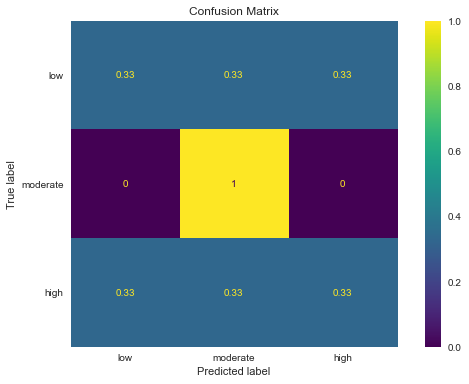

In [56]:
tree_baseline = DecisionTreeClassifier(random_state=5)
run_model(tree_baseline, X_train, y_train, X_test, y_test)

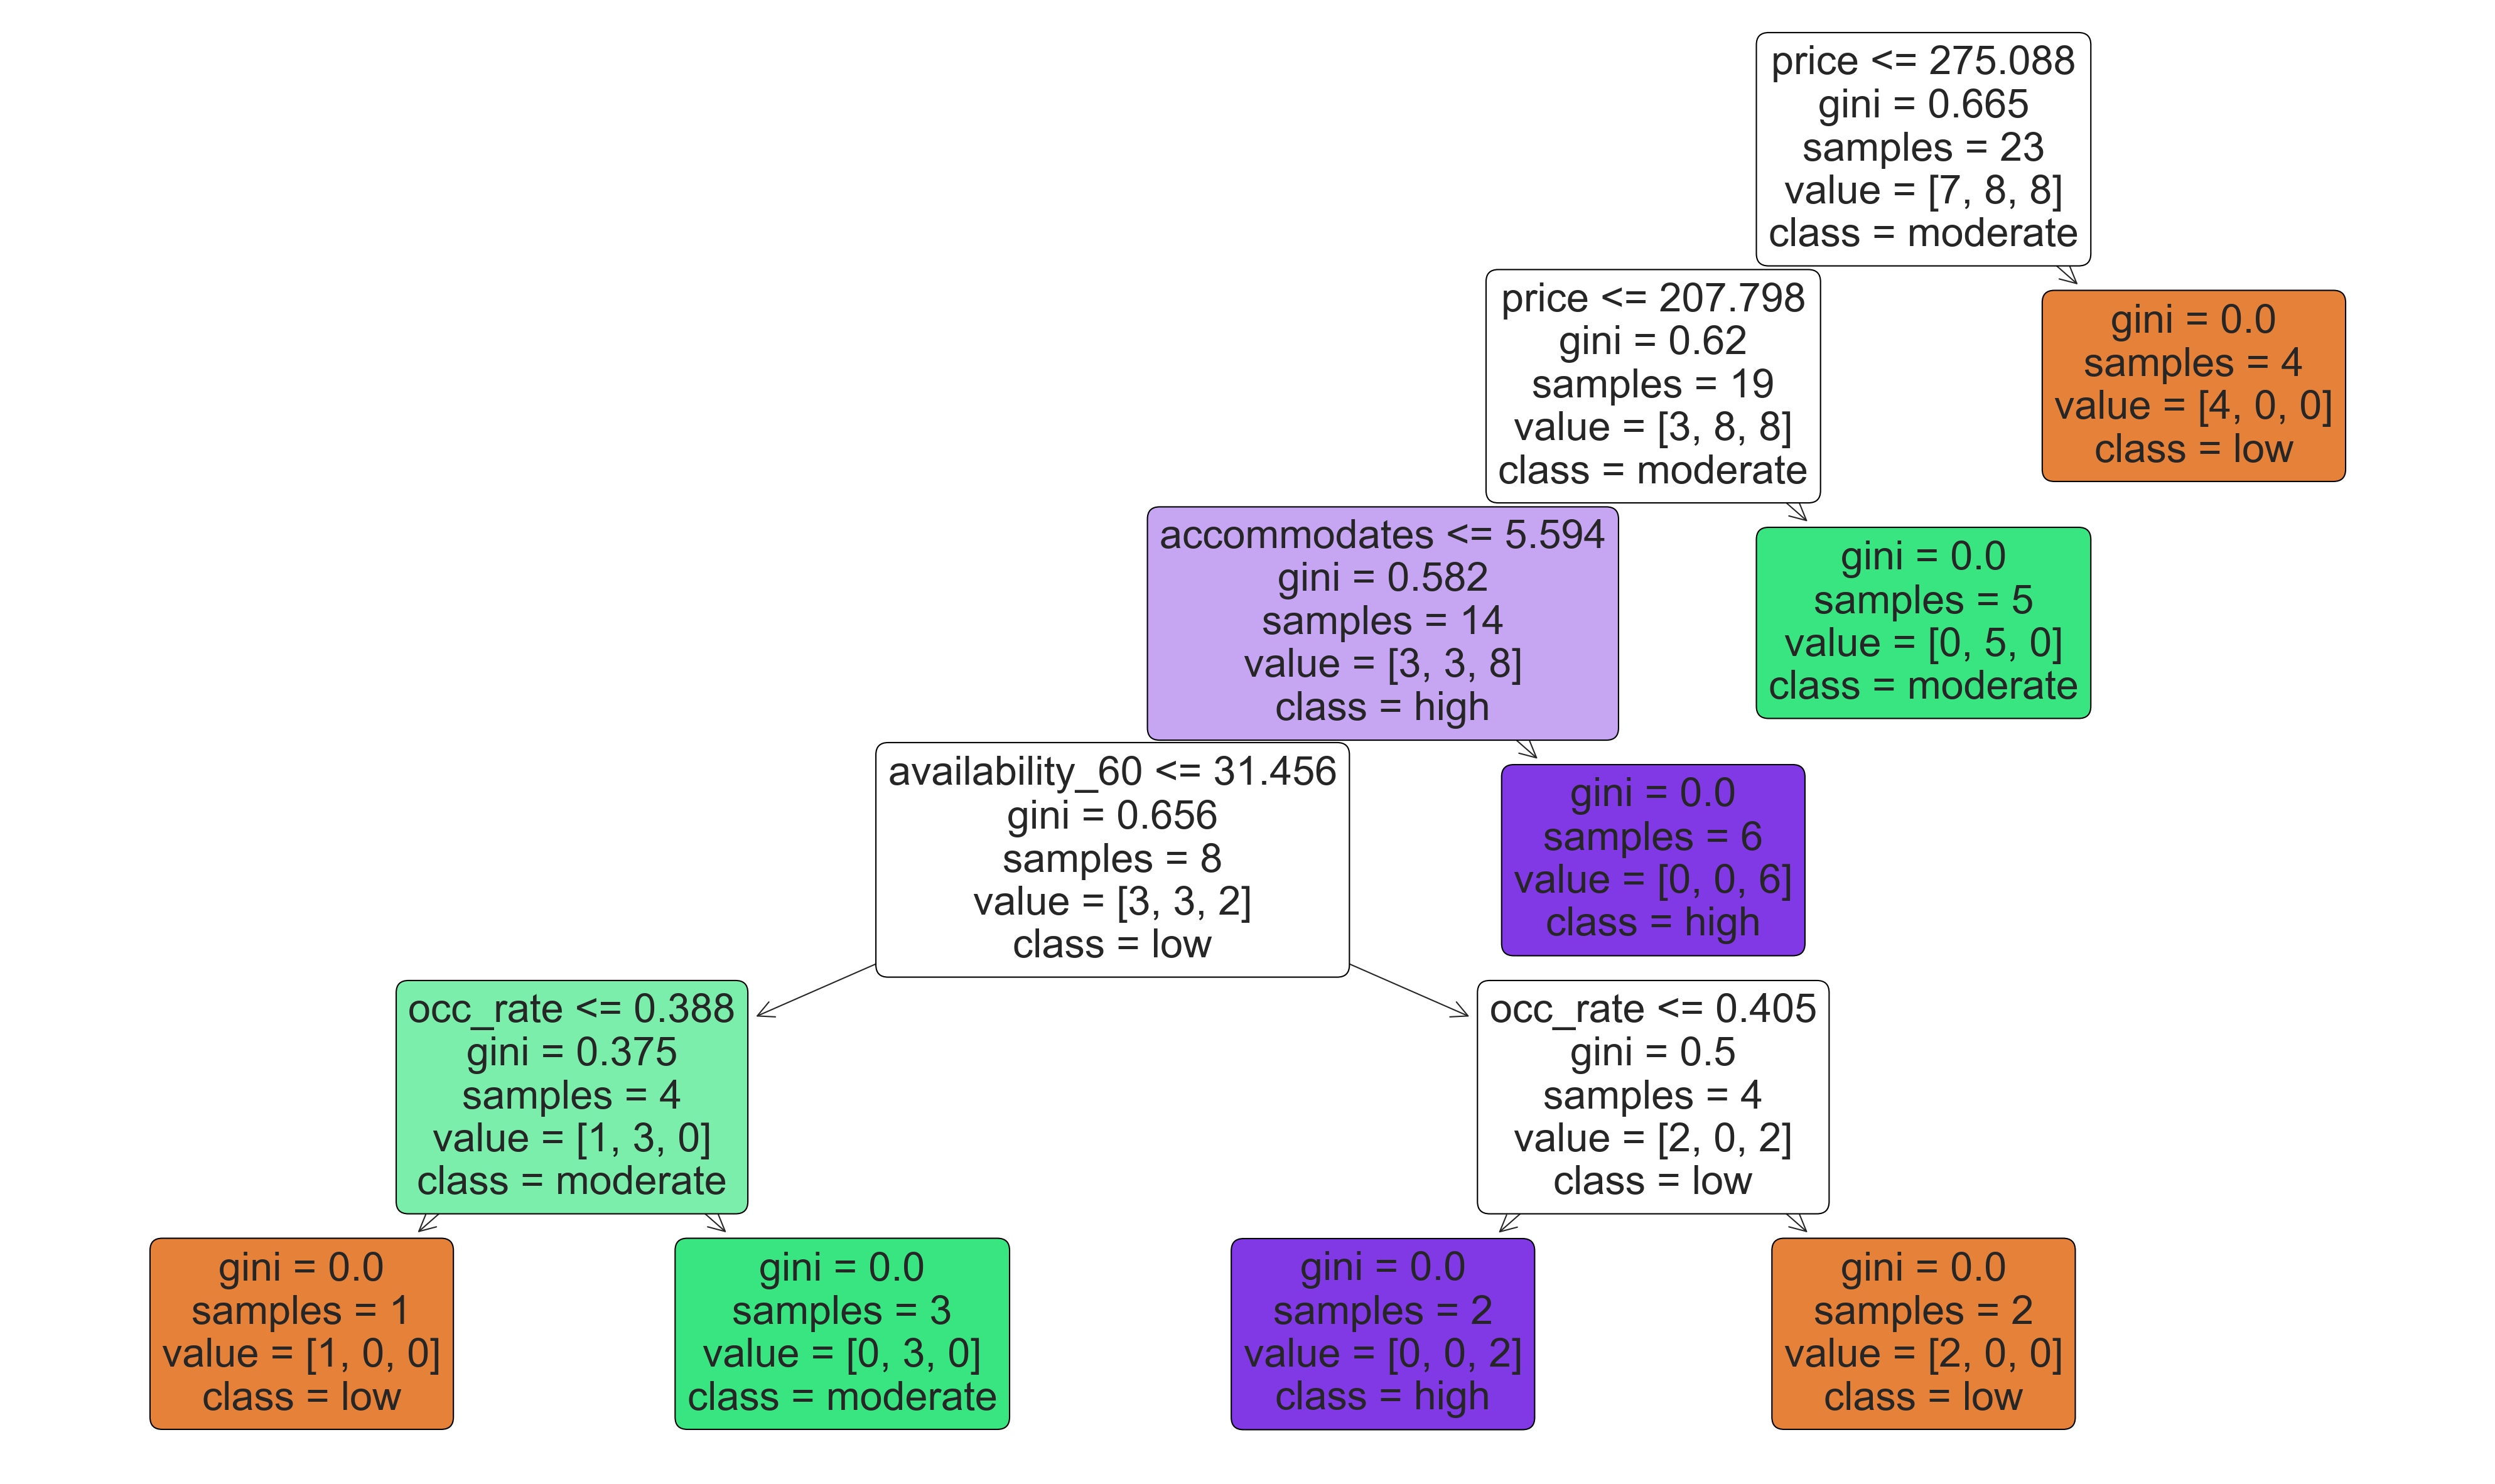

In [57]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,6), dpi=500)
plot_tree(tree_baseline,
          feature_names = X.columns, 
          class_names = class_names,
          filled = True, rounded=True)
plt.show()

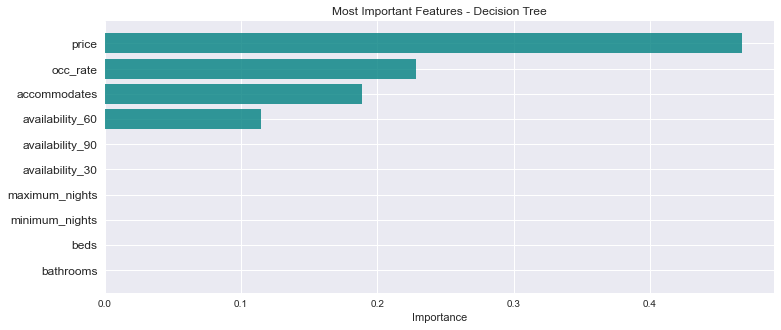

In [58]:
plot_top_10_features(tree_baseline, 'Decision Tree')

### Decision Tree Grid Search

In [59]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5,10],
    'min_samples_split': [5,10,20],
    'min_samples_leaf': [0.1, 0.3, 0.5]
}

grid_tree = GridSearchCV(clf, param_grid, cv=3)
grid_tree.fit(X_train, y_train)

grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 5}

Training accuracy score: 0.78
              precision    recall  f1-score   support

         low       0.17      0.33      0.22         3
    moderate       0.67      0.50      0.57         4
        high       0.00      0.00      0.00         3

    accuracy                           0.30        10
   macro avg       0.28      0.28      0.26        10
weighted avg       0.32      0.30      0.30        10



{'precision': 0.32, 'recall': 0.3, 'accuracy': 0.3, 'f1': 0.3}

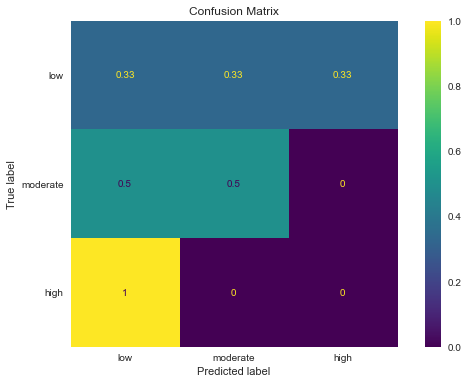

In [60]:
new_tree = DecisionTreeClassifier(criterion = grid_tree.best_params_['criterion'], 
                                   max_depth = grid_tree.best_params_['max_depth'], 
                                   min_samples_split = grid_tree.best_params_['min_samples_split'],
                                   min_samples_leaf = grid_tree.best_params_['min_samples_leaf'],
                                 random_state=5)
run_model(new_tree, X_train, y_train, X_test, y_test)

## Random Forest Model

Training accuracy score: 1.0
              precision    recall  f1-score   support

         low       0.50      0.33      0.40         3
    moderate       0.60      0.75      0.67         4
        high       0.67      0.67      0.67         3

    accuracy                           0.60        10
   macro avg       0.59      0.58      0.58        10
weighted avg       0.59      0.60      0.59        10



{'precision': 0.59, 'recall': 0.6, 'accuracy': 0.6, 'f1': 0.59}

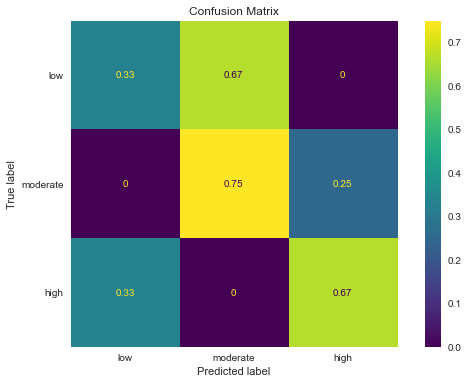

In [61]:
forest = RandomForestClassifier(random_state=8)
run_model(forest, X_train, y_train, X_test, y_test)

### Random Forest Grid Search

In [62]:
rf_param_grid = {
    'n_estimators': [100],
    'max_depth': [3,5,10],
    'min_samples_split': [5,10,20],
    'max_features': [5,10,15]
}

In [63]:
rf_grid_search = GridSearchCV(forest, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy: 34.52%

Optimal Parameters: {'max_depth': 3, 'max_features': 5, 'min_samples_split': 20, 'n_estimators': 100}


In [64]:
forest_2 = RandomForestClassifier(n_estimators=100,
                                 max_features=rf_grid_search.best_params_['max_features'], 
                                 max_depth=rf_grid_search.best_params_['max_depth'],
                                 min_samples_split=rf_grid_search.best_params_['min_samples_split'],
                                 random_state=9)

Training accuracy score: 0.35
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         3
    moderate       0.40      1.00      0.57         4
        high       0.00      0.00      0.00         3

    accuracy                           0.40        10
   macro avg       0.13      0.33      0.19        10
weighted avg       0.16      0.40      0.23        10



{'precision': 0.16, 'recall': 0.4, 'accuracy': 0.4, 'f1': 0.23}

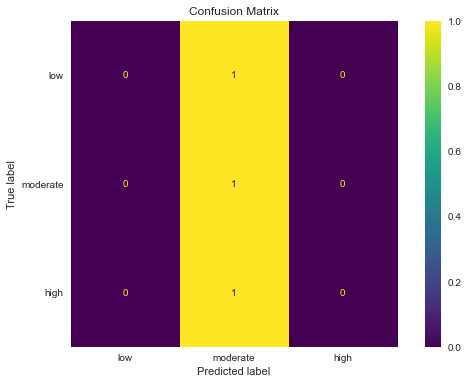

In [65]:
run_model(forest_2, X_train, y_train, X_test, y_test)

## Logistic Regression

In [66]:
logreg = LogisticRegression(C=1e12, random_state=22)

Training accuracy score: 1.0
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         3
    moderate       0.50      0.50      0.50         4
        high       0.25      0.33      0.29         3

    accuracy                           0.30        10
   macro avg       0.25      0.28      0.26        10
weighted avg       0.28      0.30      0.29        10



{'precision': 0.28, 'recall': 0.3, 'accuracy': 0.3, 'f1': 0.29}

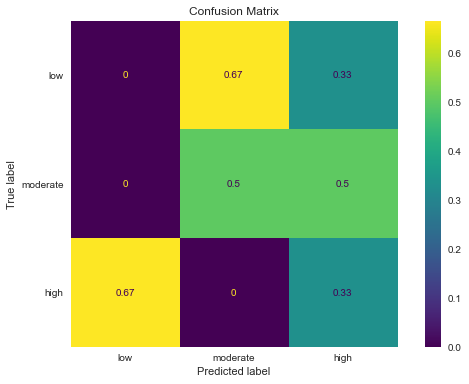

In [67]:
run_model(logreg, X_train, y_train, X_test, y_test)

## Adaboost

In [68]:
adaboost_clf = AdaBoostClassifier(random_state=42)

Training accuracy score: 0.78
              precision    recall  f1-score   support

         low       0.50      0.33      0.40         3
    moderate       0.25      0.25      0.25         4
        high       0.25      0.33      0.29         3

    accuracy                           0.30        10
   macro avg       0.33      0.31      0.31        10
weighted avg       0.33      0.30      0.31        10



{'precision': 0.32, 'recall': 0.3, 'accuracy': 0.3, 'f1': 0.31}

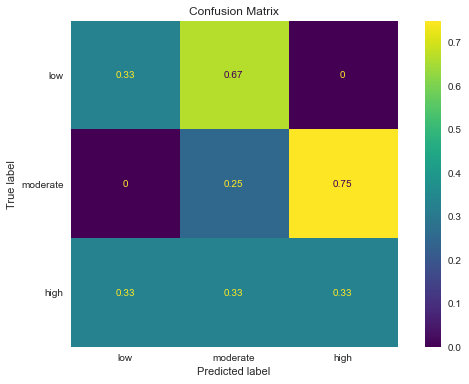

In [69]:
run_model(adaboost_clf, X_train, y_train, X_test, y_test)

## XGBoost

In [70]:
from xgboost import XGBClassifier


In [71]:
import warnings
warnings.filterwarnings("ignore")

xgb_clf = XGBClassifier(objective ='reg:squarederror', random_state=47)

[10:15:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy score: 1.0
              precision    recall  f1-score   support

         low       0.33      0.33      0.33         3
    moderate       0.75      0.75      0.75         4
        high       0.33      0.33      0.33         3

    accuracy                           0.50        10
   macro avg       0.47      0.47      0.47        10
weighted avg       0.50      0.50      0.50        10



{'precision': 0.5, 'recall': 0.5, 'accuracy': 0.5, 'f1': 0.5}

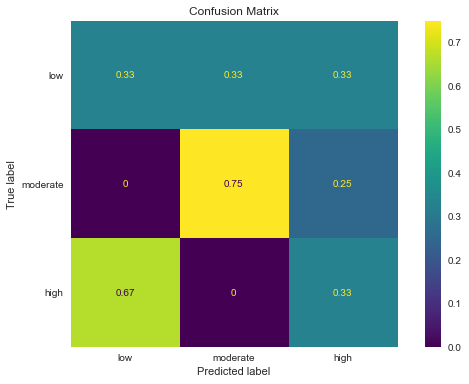

In [72]:
run_model(xgb_clf, X_train, y_train, X_test, y_test)

# Question: Can we predict whether or not an airbnb will be highly available?

## Prepare Data

### Pull in current listings dataframe

In [73]:
current_listings_df = pd.read_csv("cleaned_data/current_listing_availability.csv", index_col=0)

In [74]:
current_listings_df.head()

,last_scraped,id,host_id,host_is_superhost,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host,available
0,2021-02-20,6422,12172,1,37206.0,36.17315,-86.73581,2,1.0,3.0,...,0,0,0,0,0,0,0.7,851.666667,0,217
1,2021-02-20,25613,95811,1,37206.0,36.17826,-86.74162,2,1.0,1.0,...,0,0,0,0,0,0,0.7,1596.875000,0,21
2,2021-02-20,136015,666322,0,37214.0,36.19464,-86.67195,2,1.0,1.0,...,0,0,0,0,0,0,0.7,2193.041667,1,140
3,2021-02-20,258817,22296,1,37076.0,36.16249,-86.58988,2,1.0,2.0,...,0,0,0,0,0,0,0.7,574.875000,1,314
4,2021-02-20,289242,22296,1,37076.0,36.16102,-86.59207,1,1.0,3.0,...,0,0,0,0,0,0,0.7,511.000000,1,314


### Decide on threshold for 'highly available'

In [75]:
current_listings_df['available'].describe()

count    6144.000000
mean      174.482747
std       111.701149
min         0.000000
25%        74.000000
50%       196.000000
75%       277.000000
max       316.000000
Name: available, dtype: float64

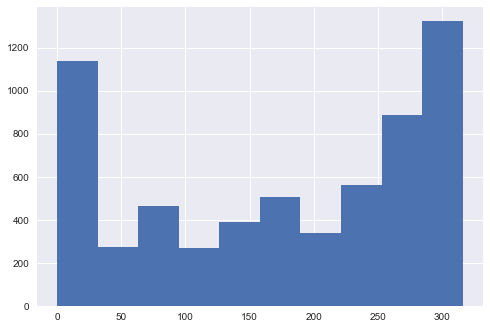

In [76]:
current_listings_df['available'].hist()

Based on InsideAirbnb's methodology, we are going to consider any availability greater than 60 days as highly available.

In [77]:
def convert_availability(x):
    if x > 60:
        # return 1 which will stand for high availability
        return 1
    else:
        # return 0 which will stand for low availability
        return 0

In [78]:
current_listings_df['availability'] = current_listings_df['available'].apply(lambda x: convert_availability(x))

In [79]:
current_listings_df

,last_scraped,id,host_id,host_is_superhost,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host,available,availability
0,2021-02-20,6422,12172,1,37206.0,36.17315,-86.73581,2,1.0,3.0,...,0,0,0,0,0,0.700000,851.666667,0,217,1
1,2021-02-20,25613,95811,1,37206.0,36.17826,-86.74162,2,1.0,1.0,...,0,0,0,0,0,0.700000,1596.875000,0,21,0
2,2021-02-20,136015,666322,0,37214.0,36.19464,-86.67195,2,1.0,1.0,...,0,0,0,0,0,0.700000,2193.041667,1,140,1
3,2021-02-20,258817,22296,1,37076.0,36.16249,-86.58988,2,1.0,2.0,...,0,0,0,0,0,0.700000,574.875000,1,314,1
4,2021-02-20,289242,22296,1,37076.0,36.16102,-86.59207,1,1.0,3.0,...,0,0,0,0,0,0.700000,511.000000,1,314,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,2021-02-20,48207668,368944610,0,37076.0,36.17157,-86.59580,5,1.0,2.0,...,0,0,0,0,0,0.700000,3151.166667,1,247,1
6140,2021-02-21,48208643,359230893,0,37203.0,36.15664,-86.79764,5,2.0,2.0,...,0,0,0,0,0,0.700000,2959.541667,1,233,1
6141,2021-02-20,48211893,153902467,0,37209.0,36.14538,-86.82469,2,2.0,2.0,...,0,0,0,1,0,0.700000,1022.000000,0,95,1
6142,2021-02-20,48224293,368944610,0,37214.0,36.17812,-86.64146,3,1.0,1.0,...,0,0,0,0,0,0.700000,2576.291667,1,249,1


In [80]:
current_listings_df.availability.value_counts()

1    4759
0    1385
Name: availability, dtype: int64

### Select Feature Columns

Since this classifier is going to be used to predict whether or not a new listing will be highly available, we need to only use features that would be available for a new listing.

In [81]:
current_listings_df.columns

Index(['last_scraped', 'id', 'host_id', 'host_is_superhost', 'zipcode',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'property_type_Condominium',
       'property_type_House', 'property_type_Other', 'property_type_Townhouse',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'neighborhood_Bellevue',
       'neighborhood_Donelson', 'neighborhood_Downtown',
       'neighborhood_East_Nashville', 'neighborhood_Madison',
       'neighborhood_Midtown', 'neighborhood_North_Nashville',
       'neighborhood_Parkwood', 'neighborhoo

In [82]:
current_listings_model_data = current_listings_df[['accommodates','bathrooms','beds','price','instant_bookable',
                                                   'property_type_Condominium', 'property_type_House','property_type_Other',
                                                   'property_type_Townhouse','room_type_Hotel room', 'room_type_Private room',
                                                   'room_type_Shared room', 'neighborhood_Bellevue','neighborhood_Donelson',
                                                   'neighborhood_Downtown','neighborhood_East_Nashville',
                                                   'neighborhood_Madison','neighborhood_Midtown',
                                                   'neighborhood_North_Nashville', 'neighborhood_Parkwood',
                                                   'neighborhood_South_Nashville','neighborhood_Southeast_Nashville',
                                                   'neighborhood_West_Nashville','neighborhood_Whites_Creek','availability']]

## K-Nearest Neighbors

## Random Forest Model

In [83]:
y = current_listings_model_data['availability']
X = current_listings_model_data.drop(columns=['availability'])

In [84]:
class_names = np.array(['low','high'])

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

Training accuracy score: 0.98
              precision    recall  f1-score   support

         low       0.43      0.24      0.31       436
        high       0.79      0.90      0.84      1408

    accuracy                           0.74      1844
   macro avg       0.61      0.57      0.58      1844
weighted avg       0.71      0.74      0.72      1844



{'precision': 0.71, 'recall': 0.74, 'accuracy': 0.74, 'f1': 0.72}

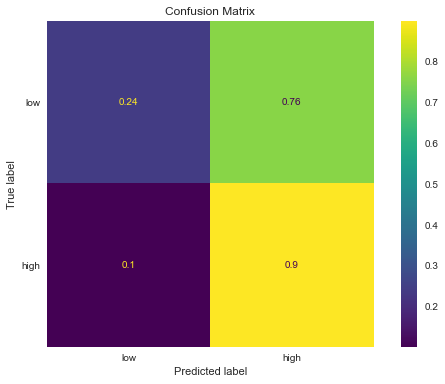

In [86]:
forest = RandomForestClassifier()
run_model(forest, X_train, y_train, X_test, y_test)

### Deal with Class Imbalance

In [87]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

Training accuracy score: 0.99
              precision    recall  f1-score   support

         low       0.40      0.33      0.36       436
        high       0.80      0.85      0.82      1408

    accuracy                           0.72      1844
   macro avg       0.60      0.59      0.59      1844
weighted avg       0.71      0.72      0.71      1844



{'precision': 0.71, 'recall': 0.72, 'accuracy': 0.72, 'f1': 0.71}

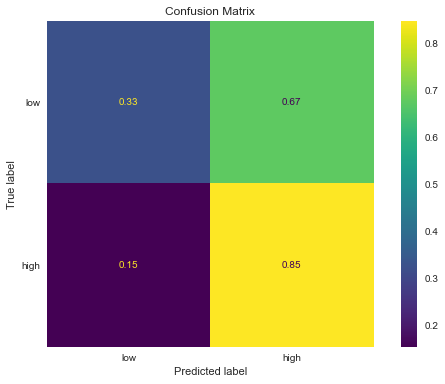

In [88]:
run_model(forest, X_train_resampled, y_train_resampled, X_test, y_test)

### Grid Search

In [89]:
rf_param_grid = {
    'n_estimators': [25,40,100],
    'max_depth': [3,5,10],
    'min_samples_split': [5,10,20],
    'max_features': [5,10,15]
}

In [90]:
rf_grid_search = GridSearchCV(forest, rf_param_grid, scoring='accuracy', cv=3)
rf_grid_search.fit(X_train_resampled, y_train_resampled)

print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy: 78.66%

Optimal Parameters: {'max_depth': 10, 'max_features': 15, 'min_samples_split': 5, 'n_estimators': 25}


In [91]:
forest_2 = RandomForestClassifier(n_estimators=rf_grid_search.best_params_['n_estimators'],
                                 max_features=rf_grid_search.best_params_['max_features'], 
                                 max_depth=rf_grid_search.best_params_['max_depth'],
                                 min_samples_split=rf_grid_search.best_params_['min_samples_split'],
                                 random_state=9)

Training accuracy score: 0.83
              precision    recall  f1-score   support

         low       0.71      0.13      0.22       436
        high       0.78      0.98      0.87      1408

    accuracy                           0.78      1844
   macro avg       0.75      0.56      0.55      1844
weighted avg       0.77      0.78      0.72      1844



{'precision': 0.77, 'recall': 0.78, 'accuracy': 0.78, 'f1': 0.72}

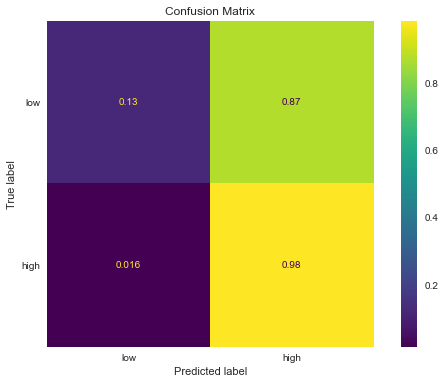

In [95]:
run_model(forest_2, X_train, y_train, X_test, y_test)

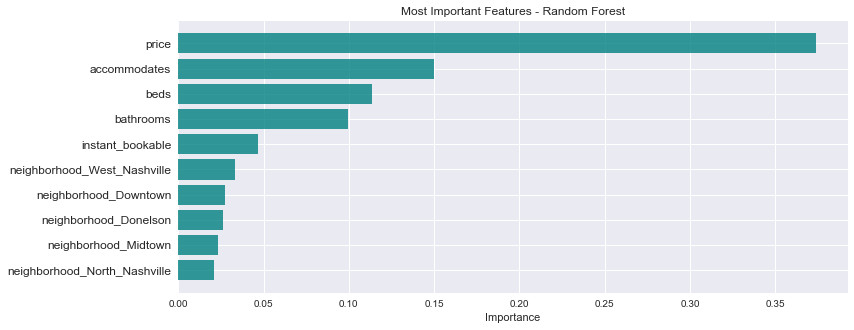

In [96]:
plot_top_10_features(forest_2, 'Random Forest')

In [93]:
# save model

import pickle

rand_forest = forest_2.fit(X_train,y_train)

with open('random_forest.pickle','wb') as f:
    pickle.dump(rand_forest, f)

## AdaBoost Model

Training accuracy score: 0.76
              precision    recall  f1-score   support

         low       0.32      0.29      0.30       427
        high       0.79      0.81      0.80      1417

    accuracy                           0.69      1844
   macro avg       0.55      0.55      0.55      1844
weighted avg       0.68      0.69      0.69      1844



{'precision': 0.68, 'recall': 0.69, 'accuracy': 0.69, 'f1': 0.69}

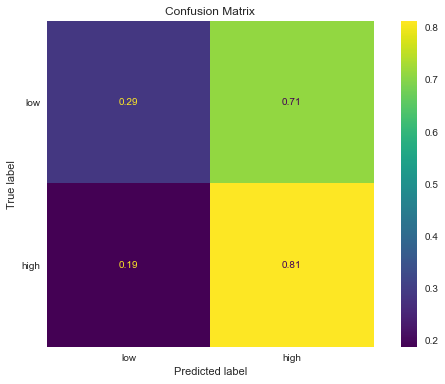

In [96]:
adaboost_clf = AdaBoostClassifier(random_state=42)
run_model(adaboost_clf,X_train_resampled, y_train_resampled, X_test, y_test)

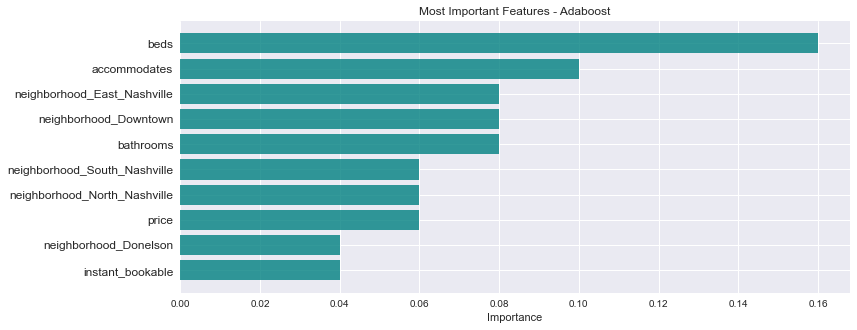

In [97]:
plot_top_10_features(adaboost_clf, 'Adaboost')

### GridSearch

## Gradient Boosting Model

Training accuracy score: 0.82
              precision    recall  f1-score   support

         low       0.37      0.26      0.30       427
        high       0.80      0.87      0.83      1417

    accuracy                           0.73      1844
   macro avg       0.58      0.56      0.57      1844
weighted avg       0.70      0.73      0.71      1844



{'precision': 0.7, 'recall': 0.73, 'accuracy': 0.73, 'f1': 0.71}

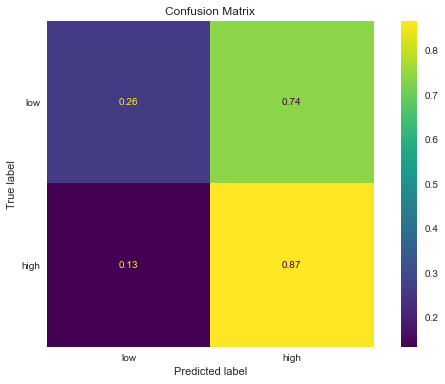

In [98]:
gbt_clf = GradientBoostingClassifier(random_state=42)
run_model(gbt_clf,X_train_resampled, y_train_resampled, X_test, y_test)

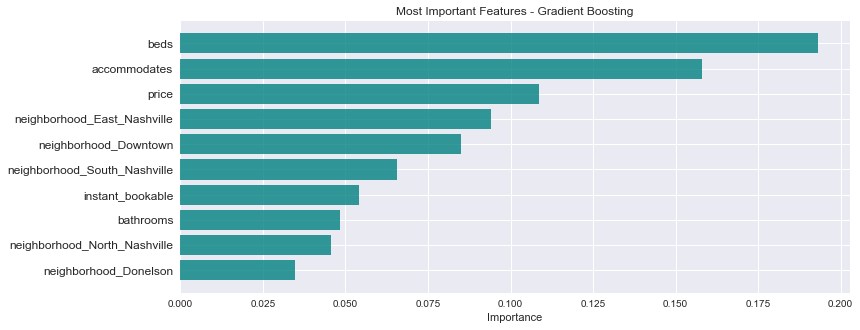

In [99]:
plot_top_10_features(gbt_clf, 'Gradient Boosting')

## XGBoost Model

Training accuracy score: 0.94
              precision    recall  f1-score   support

         low       0.42      0.27      0.33       427
        high       0.80      0.89      0.84      1417

    accuracy                           0.74      1844
   macro avg       0.61      0.58      0.58      1844
weighted avg       0.71      0.74      0.72      1844



{'precision': 0.71, 'recall': 0.74, 'accuracy': 0.74, 'f1': 0.72}

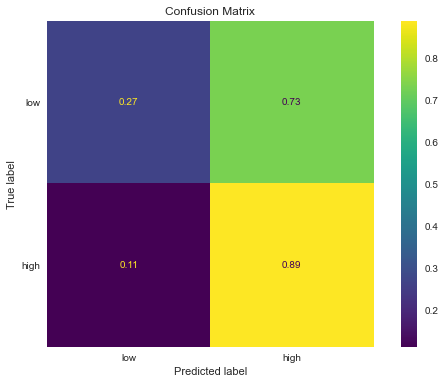

In [100]:
xgb_clf = XGBClassifier(objective ='reg:squarederror', random_state=47)
run_model(xgb_clf,X_train_resampled, y_train_resampled, X_test, y_test)

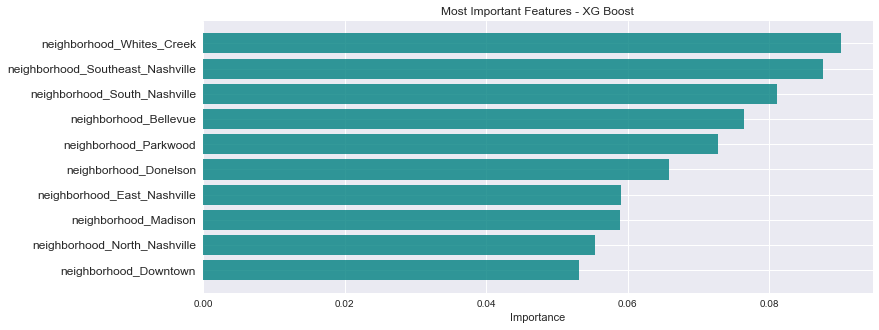

In [101]:
plot_top_10_features(xgb_clf, "XG Boost")

### GridSearch

In [111]:
xgb_param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [118]:
warnings.filterwarnings("ignore")

xgb_grid_search = GridSearchCV(xgb_clf, xgb_param_grid, 
                               scoring='recall', cv=None, n_jobs=1, )
xgb_grid_search.fit(X_train_resampled, y_train_resampled)

print(f"Testing Accuracy: {xgb_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {xgb_grid_search.best_params_}")

Testing Accuracy: 89.26%

Optimal Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.5}


In [119]:
xgb_grid_search.best_params_['learning_rate']

0.1

In [120]:
xgb_clf_2 = XGBClassifier(learning_rate = xgb_grid_search.best_params_['learning_rate'],
                          max_depth = xgb_grid_search.best_params_['max_depth'],
                          min_child_weight = xgb_grid_search.best_params_['min_child_weight'],
                          subsample = xgb_grid_search.best_params_['subsample'],
                          n_estimators = xgb_grid_search.best_params_['n_estimators'],
                          objective ='reg:squarederror',
                          random_state=61)

Training accuracy score: 0.85
              precision    recall  f1-score   support

         low       0.50      0.15      0.24       427
        high       0.79      0.95      0.86      1417

    accuracy                           0.77      1844
   macro avg       0.65      0.55      0.55      1844
weighted avg       0.72      0.77      0.72      1844



{'precision': 0.72, 'recall': 0.77, 'accuracy': 0.77, 'f1': 0.72}

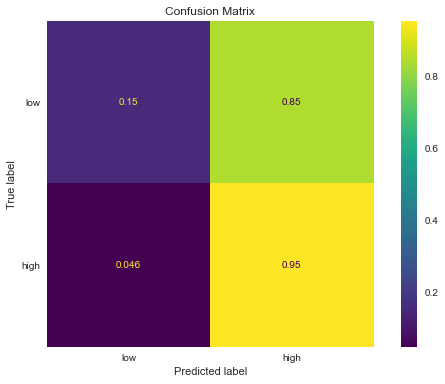

In [122]:
run_model(xgb_clf_2,X_train, y_train, X_test, y_test)

In [94]:
X_train.to_csv("cleaned_data/X_train_data.csv")
y_train.to_csv("cleaned_data/y_train_data.csv")
X_test.to_csv("cleaned_data/X_test_data.csv")
y_test.to_csv("cleaned_data/y_test_data.csv")

# Dashboard

In [123]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
from dash.dependencies import Input, Output

In [ ]:
app = dash.Dash()
server= app.server

In [ ]:
app.layout = html.Div([
    # Setting the main title
    html.H1("Model Results", style={"textAlign":"center"}), html.Div([
        html.H1("Classification Report",
               style={"textAlign":"center"})
        # Add the first dropdown
        dcc.Dropdown(id='my_dropdown',
                    options=[{'label':'Random Forest', 'value':'forest'},
                             {'label': 'XGBoost', 'value':'xgb_clf'}],
                    multi=False, value=['forest'],
                    style={'display':'block', 'margin-left':'auto',
                          'margin_right':'auto', 'width':'60%'}),
        dcc.Graph(id='classification_report'),
        html.H1("Confusion Matrix", style={'textAlign': 'center'}),
        # Add the second dropdown
        dcc.Dropdown(id='my-dropdown2',
                    options =[{'label':'Random Forest', 'value':'forest'},
                              {'label':'XGBoost', 'value':'xgb_clf'}],
                    multi=False, value=['forest'],
                    style={'display':'block', 'margin-left':'auto',
                          'margin-right':'auto', 'width':'60%'}),
        dcc.Graph(id='confusion_matrix')
    ], className='container'),
])

In [ ]:
@app.callback(Output('classification_report', 'figure'),
             [Input('my-dropdown','value')])
def update_graph(selected_dropdown):
    dropdown = {'Random Forest':'forest','XGBoost':'xgb_clf'}

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrix')
    disp = plot_confusion_matrix(model, X_test, y_test, ax = ax,
                                 display_labels = class_names,
                                 normalize='true')